![terrainbento logo](../images/terrainbento_logo.png)


# Introduction to boundary conditions in terrainbento.


## Overview
This tutorial shows example usage of the terrainbento boundary handlers. For comprehensive information about all options and defaults, refer to the [documentation](http://terrainbento.readthedocs.io/en/latest/). 

## Prerequisites
This tutorial assumes you have at least skimmed the [terrainbento manuscript](https://www.geosci-model-dev.net/12/1267/2019/) and worked through the [Introduction to terrainbento](http://localhost:8888/notebooks/example_usage/Introduction_to_terrainbento.ipynb) tutorial.

### terrainbento boundary handlers
terrainbento includes five boundary handlers designed to make it easier to treat different model run boundary conditions. Four boundary handlers modify the model grid in order to change the base level the model sees. The final one calculates how changes in precipitation distribution statistics change the value of erodibility by water. Hyperlinks in the list below go to the documentation for each of the boundary condition handlers. 

1. [`CaptureNodeBaselevelHandler`](https://terrainbento.readthedocs.io/en/latest/source/terrainbento.boundary_handlers.capture_node_baselevel_handler.html?highlight=capture%20node) implements external drainage capture. 
2. [`SingleNodeBaselevelHandler`](https://terrainbento.readthedocs.io/en/latest/source/terrainbento.boundary_handlers.single_node_baselevel_handler.html?highlight=SingleNodeBaselevelHandler) modifies the elevation of one model grid node, intended to be the outlet of a modeled watershed. 
3. [`NotCoreNodeBaselevelHandler`](https://terrainbento.readthedocs.io/en/latest/source/terrainbento.boundary_handlers.not_core_node_baselevel_handler.html?highlight=NotCoreNodeBaselevelHandler) either increments all the core nodes, or all the not-core nodes up or down. 
4. [`GenericFuncBaselevelHandler`](https://terrainbento.readthedocs.io/en/latest/source/terrainbento.boundary_handlers.generic_function_baselevel_handler.html?highlight=GenericFuncBaselevelHandler) is a generic boundary condition handler that modifies the model grid based on a user specified function of the model grid and model time. 
5. [`PrecipChanger`](https://terrainbento.readthedocs.io/en/latest/source/terrainbento.boundary_handlers.precip_changer.html?highlight=PrecipChanger) modifies precipitation distribution parameters (in **St** models) or erodibility by water (all other models). 

If you have additional questions related to using the boundary handlers or your research requires additonal tools to handle boundary conditions, please let us know by making an [Issue on GitHub](https://github.com/TerrainBento/terrainbento/issues). 

In the `SingleNodeBaselevelHandler` and the `NotCoreNodeBaselevelHandler`, rate of baselevel fall at a single node or at all not-core model grid nodes can be specified as a constant rate or a time-elevation history. These and other options are described in the documentation. Note that a model instance can have more than one boundary handler at a time.

The swiss-army knife of boundary condition handling is the `GenericFuncBaselevelHandler` so we will focus on it today. 

### Example Usage

To begin, we will import the required python modules. 

In [1]:
from terrainbento import Basic

import numpy as np
np.random.seed(42)

import matplotlib
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt
import holoviews as hv
hv.notebook_extension('matplotlib')
#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Figure properties
%matplotlib inline
import panel as pn
pn.pane.Matplotlib.tight = True

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Next we will create the parameter dictionary needed to instantiate the Basic model. All parameters used are specified in this notebook block. Refer to the base class and individual model documentation for required parameters. Let's start with an initial topo of 1000m and drop all the baselevel nodes. 

In [ ]:
basic_params = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 2e5
    },

    # Create the Grid
    "grid": {
        "RasterModelGrid": [
            (25, 40),
            {
                "xy_spacing": 40
            },
            {
                "fields": {
                    "node": {
                        "topographic__elevation": {
                        "random": [{
                            "where": "CORE_NODE"
                        }],
                        "constant": [{
                            "value": 1000.
                        }]
                    }
                    }
                }
            },
        ]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "NotCoreNodeBaselevelHandler": {
            "lowering_rate": -0.001
        }
    },
    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "output/model_basic_output_basicBC1",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.00005,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0.00001,
}

In [ ]:
basic = Basic.from_dict(basic_params)
basic.run()

In [ ]:
ds = basic.to_xarray_dataset(time_unit='years', space_unit='meters')

In [ ]:
hvds_topo = hv.Dataset(ds.topographic__elevation)

In [ ]:
topo = hvds_topo.to(hv.Image, ['x', 'y'],
                    label='Basic').options(interpolation='bilinear',
                                           cmap='viridis',
                                           colorbar=True)
topo.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo

Finally we remove the xarray datasets from and use the model function remove_output_netcdfs to remove the files created by running the model. 

In [ ]:
ds.close()
basic.remove_output_netcdfs()

Now, let's implement a situation where start from zero topography and lift things up. 

In [ ]:
basic_params2 = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 2e5
    },

    # Create the Grid
    "grid": {
        "RasterModelGrid": [
            (25, 40),
            {
                "xy_spacing": 40
            },
            {
                "fields": {
                    "node": {
                        "topographic__elevation": {
                        "random": [{
                            "where": "CORE_NODE"
                        }],
                        "constant": [{
                            "value": 0.
                        }]
                    }
                    }
                }
            },
        ]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "NotCoreNodeBaselevelHandler": {
            "modify_core_nodes": True,
            "lowering_rate": -0.001
        }
    },
    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "output/model_basic_output_basicBC2",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.00005,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0.00001,
}

In [ ]:
basic2 = Basic.from_dict(basic_params2)
basic2.run()

ds2 = basic2.to_xarray_dataset(time_unit='years', space_unit='meters')

hvds_topo2 = hv.Dataset(ds2.topographic__elevation)

topo2 = hvds_topo2.to(hv.Image, ['x', 'y'],
                    label='Basic').options(interpolation='bilinear',
                                           cmap='viridis',
                                           colorbar=True)
topo2.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo2

In [ ]:
ds2.close()
basic2.remove_output_netcdfs()

Rather than taking a constant baselevel fall rate, the `GenericFuncBoundaryHandler` takes a function. This function is expected to accept two arguments --- the model grid and the elapsed model integration time --- and return an array of size number-of-model-grid-nodes that represents the spatially variable rate of boundary lowering or core-node uplift. 

For our example we will create a model grid initially at ~1000 m elevation at all grid nodes, then we will progressively drop the model boundary elevations. We will vary the spatial and temporal pattern of boundary elevations such that the boundaries will drop more rapidly at the beginning of the model run than at the end and the boundaries will drop more on the bottom of the model grid domain than on the top.  

If you are not familiar with user defined python functions, consider reviewing [this tutorial](https://www.datacamp.com/community/tutorials/functions-python-tutorial#udf). 

Thus our function will look as follows:

In [ ]:
def dropping_boundary_condition_1(grid, t):
    f = 0.007
    dzdt = -1. * (2e5 - t) / 2e5 * f * (
        (grid.y_of_node.max() - grid.y_of_node) / grid.y_of_node.max())
    return dzdt

Importantly, note that this function returns the *rate* at which the boundary will drop, *not* the elevation of the boundary through time. 

Next we construct the parameter dictionary we need to initialize the terrainbento model. For this example we will just use the **Basic** model. 

In order to specify that we want to use the `GenericFuncBaselevelHandler` we provide it as a value to the parameter `BoundaryHandlers`. We can provide the parameters the baselevel handler needs directly in the parameter dictionary, or we can create a new sub-dictionary, as is done below. 

In [ ]:
import numpy as np
np.random.seed(42)
basic_params3 = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 2e5
    },

    # Create the Grid.
    "grid": {
        "RasterModelGrid": [(25, 40), {
            "xy_spacing": 40
        }, {
            "fields": {
                "node": {
                    "topographic__elevation": {
                        "random": [{
                            "where": "CORE_NODE"
                        }],
                        "constant": [{
                            "value": 1000.
                        }]
                    }
                }
            }
        }]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "GenericFuncBaselevelHandler": {
            "modify_core_nodes" : False,
            "function": dropping_boundary_condition_1
        }
    },

    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "output/model_basic_output_intro_bc3",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.0001,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0,
}

Next we create a model instance, run it, create an xarray dataset of the model output, and convert it to the holoviews format. 

In [ ]:
basic3 = Basic.from_dict(basic_params3)
basic3.run()
ds3 = basic3.to_xarray_dataset(time_unit='years', space_unit='meters')
hvds_topo3 = hv.Dataset(ds3.topographic__elevation)

Finally we create an image of the topography with a slider bar. 

In [ ]:
%opts Image style(interpolation='bilinear', cmap='viridis') plot[colorbar=True]
topo3 = hvds_topo3.to(hv.Image, ['x', 'y'], label='Rate Decreases')
topo3.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo3

### CSDMS Boundary condition

Now let's create an uplift field where some of the core nodes are being uplifted.

For our example we will create a model grid initially at 0 m elevation at all grid nodes, then we will progressively uplift the model core nodes. We will assume a constant spatial and temporal pattern of uplift rates for teh core nodes.  

If you are not familiar with user defined python functions, consider reviewing [this tutorial](https://www.datacamp.com/community/tutorials/functions-python-tutorial#udf). 

Our function will look as follows:

In [2]:
def dropping_boundary_condition_CSDMS(grid,t):
    M = np.zeros((25,74))
    M[6:18, 1:5] = 1;M[3:7,1:13]=1;M[18:22,1:13]=1;#M[11:14,7:13]=1;M[12:18, 9:13] = 1;
    M[6:12, 15:18] = 1;M[12:18, 23:26] = 1;M[3:7,15:26]=1;M[10:14,15:26]=1;M[18:22,15:26]=1
    M[3:7, 28:39] = 1;M[3:22,28:32]=1;M[3:22,35:39]=1;M[18:22, 28:39] = 1;
    M[3:7, 41:59] = 1;M[3:22,41:45]=1;M[3:22,48:52]=1;M[3:22,55:59]=1;
    M[6:12, 61:64] = 1;M[12:18, 69:72] = 1;M[3:7,61:72]=1;M[10:14,61:72]=1;M[18:22,61:72]=1
    M = np.flipud(M)
    dzdt = -0.001*M.flatten()
    return dzdt


Next we will make a new model that is exactly the same as the other model but uses the new function and a different output file name and a lower  water_erodibility constant (change to 1e-5)

In [3]:
basic_basic_csdms_params = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 2e5
    },

    # Create the Grid.
    "grid": {
        "RasterModelGrid": [(25, 74), {
            "xy_spacing": 40
        }, {
            "fields": {
                "node": {
                    "topographic__elevation": {
                        "random": [{
                            "where": "CORE_NODE"
                        }],
                        "constant": [{
                            "value": 1000.
                        }]
                    }
                }
            }
        }]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "GenericFuncBaselevelHandler": {
            "modify_core_nodes" : True,
            "function": dropping_boundary_condition_CSDMS
        }
    },

    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "output/model_basic_output_intro_bc_csdms",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.0001,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0,
}

Next we create a model instance

In [4]:
basic_csdms = Basic.from_dict(basic_basic_csdms_params)

Run it, create an xarray dataset of the model output, and convert it to the holoviews format. 

In [5]:
basic_csdms.run()
ds_csdms = basic_csdms.to_xarray_dataset(time_unit='years', space_unit='meters')
hvds_topo_csdms = hv.Dataset(ds_csdms.topographic__elevation)

Finally we create an image of the topography with a slider bar. 

:HoloMap   [time]
   :Image   [x,y]   (topographic__elevation)
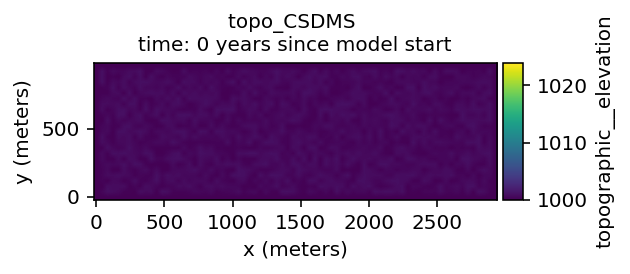
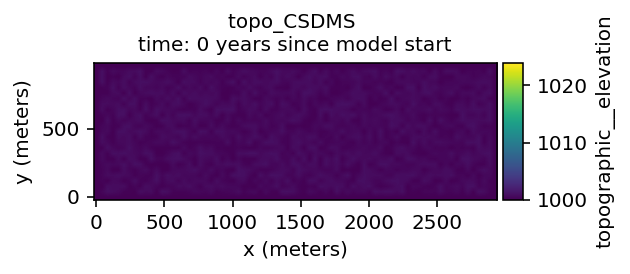
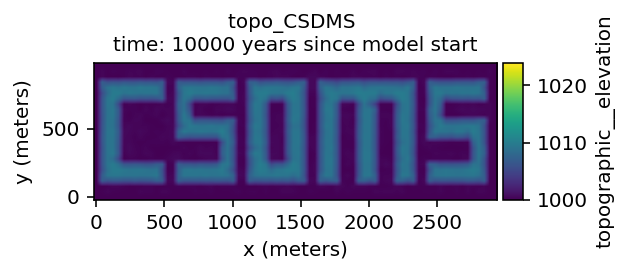
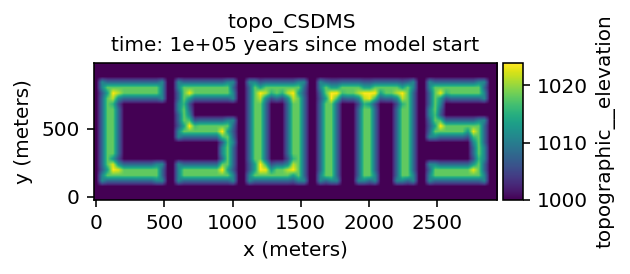
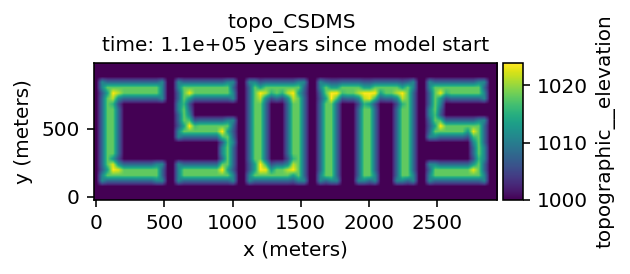
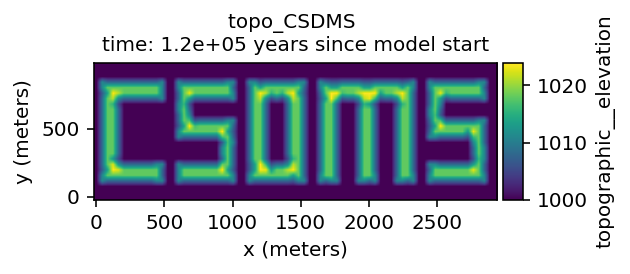
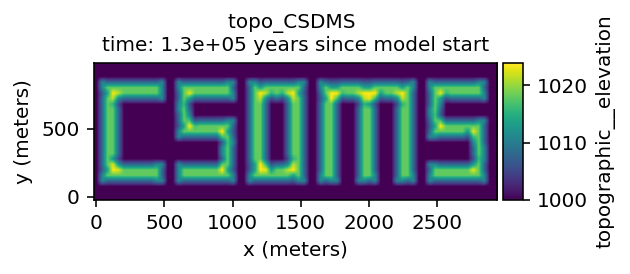
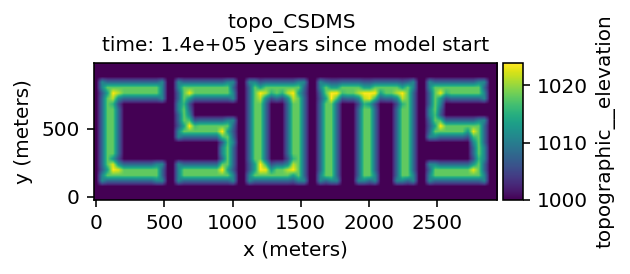
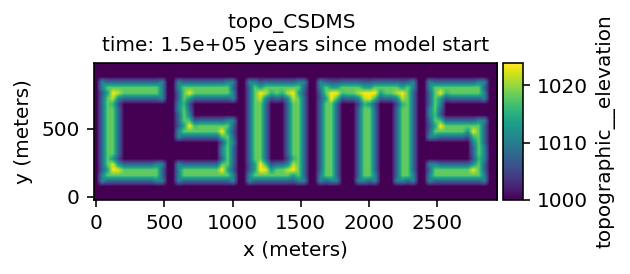
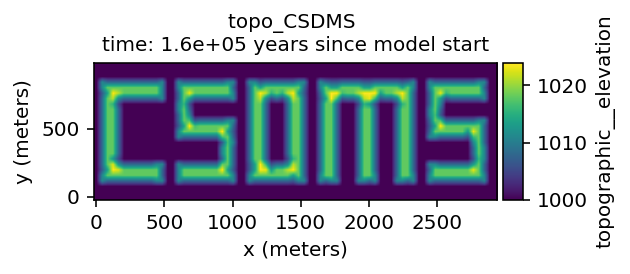
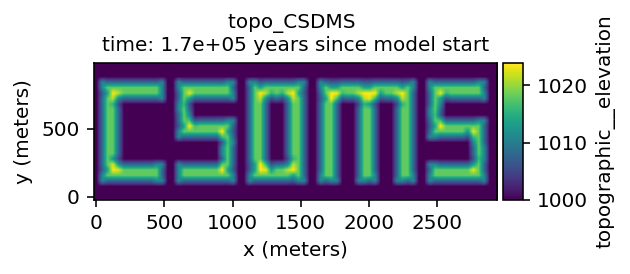
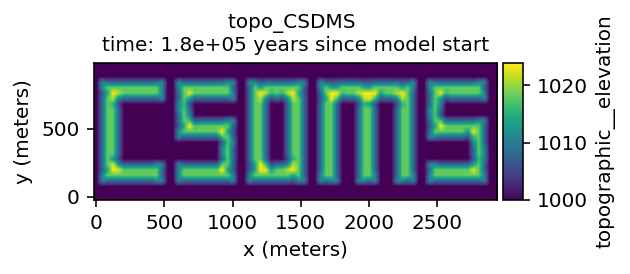
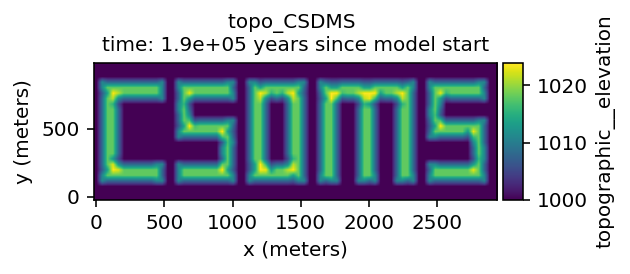
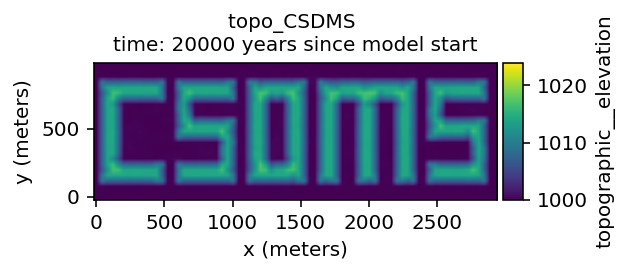
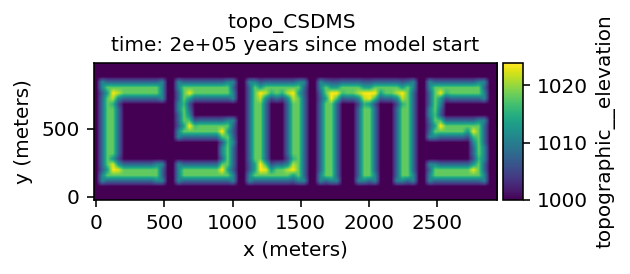
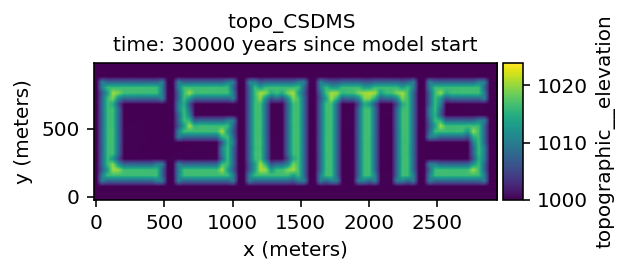
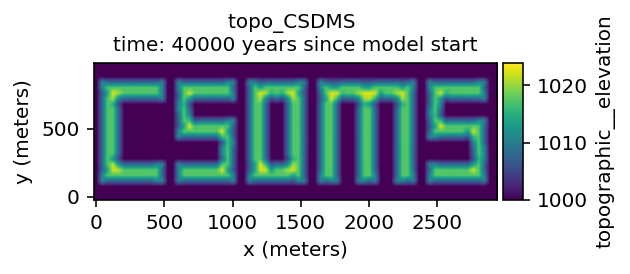
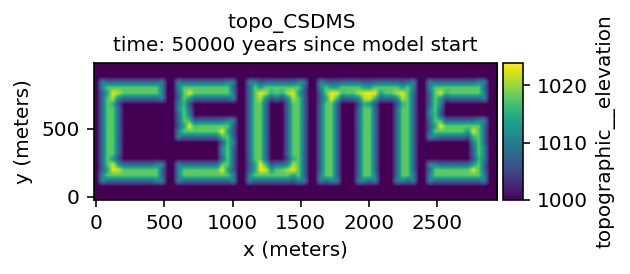
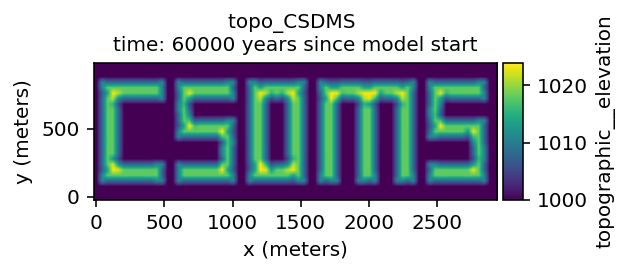
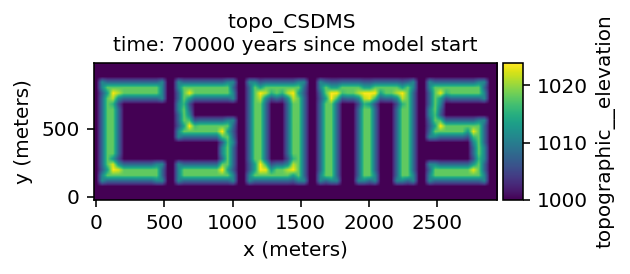
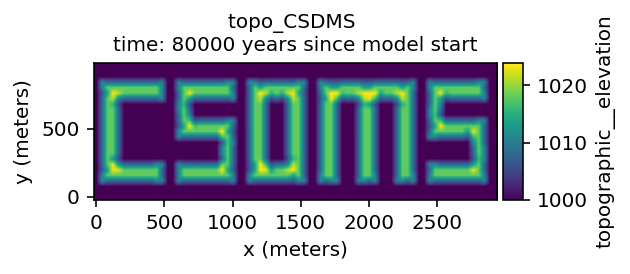
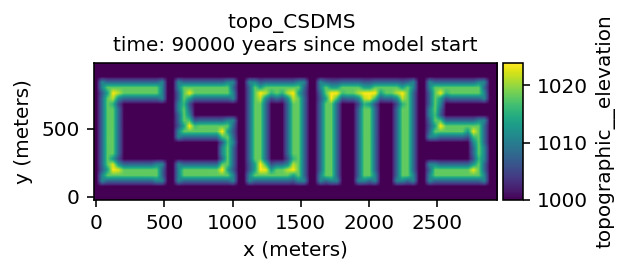

In [6]:
%opts Image style(interpolation='bilinear', cmap='viridis') plot[colorbar=True]
topo_csdms = hvds_topo_csdms.to(hv.Image, ['x', 'y'], label='topo_CSDMS')
topo_csdms.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo_csdms

## Challenge -- Contrasting with a slightly different boundary condition

If we wanted a different pattern, we would just need to change the function. Try to make run a model run in which the rate of boundary lowering increases through time instead of decreasing through time: 

Define dropping_boundary_condition_4 as a function:

Next make a new model that is exactly the same as the other model but uses the new function and a different output file name

Run the model and plot as holoviews

In [ ]:
basic4 = Basic.from_dict(fourth_model_params)
basic4.run()
ds4 = basic4.to_xarray_dataset(time_unit='years', space_unit='meters')
hvds_topo4 = hv.Dataset(ds4.topographic__elevation)

%opts Image style(interpolation='bilinear', cmap='viridis') plot[colorbar=True]
topo4 = hvds_topo4.to(hv.Image, ['x', 'y'], label='Rate Increases')

topo4.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo_csdms + topo3 + topo4 

As you can see, the landscapes created by the **Basic** model with the two slightly different boundary conditions are different. One thing to think about is what sort of geologic settings might create each of these two alternative boundary conditions and how you could quantitatively compare these two output landscapes. 

Finally we remove the xarray datasets from and use the model function `remove_output_netcdfs` to remove the files created by running the model. 

In [ ]:
del topo, hvds_topo, topo2, hvds_topo2, topo3, hvds_topo3
ds_csdms.close()
ds3.close()
ds4.close()
basic_csdms.remove_output_netcdfs()
basic3.remove_output_netcdfs()
basic4.remove_output_netcdfs()

## Next Steps

- We recommend you review the [terrainbento manuscript](https://www.geosci-model-dev.net/12/1267/2019/).

- There are three additional introductory tutorials: 

    1) [Introduction terrainbento](Introduction_to_terrainbento.ipynb) 
    
    2) **This Notebook**: [Introduction to boundary conditions in terrainbento](introduction_to_boundary_conditions.ipynb)
    
    3) [Introduction to output writers in terrainbento](introduction_to_output_writers.ipynb). 
    
    
- Five examples of steady state behavior in coupled process models can be found in the following notebooks:

    1) [Basic](../coupled_process_elements/model_basic_steady_solution.ipynb) the simplest landscape evolution model in the terrainbento package.

    2) [BasicVm](../coupled_process_elements/model_basic_var_m_steady_solution.ipynb) which permits the drainage area exponent to change

    3) [BasicCh](../coupled_process_elements/model_basicCh_steady_solution.ipynb) which uses a non-linear hillslope erosion and transport law

    4) [BasicVs](../coupled_process_elements/model_basicVs_steady_solution.ipynb) which uses variable source area hydrology

    5) [BasisRt](../coupled_process_elements/model_basicRt_steady_solution.ipynb) which allows for two lithologies with different K values
    
    6) [RealDEM](coupled_process_elements/model_basic_realDEM.ipynb) Run the basic terrainbento model with a real DEM as initial condition. 